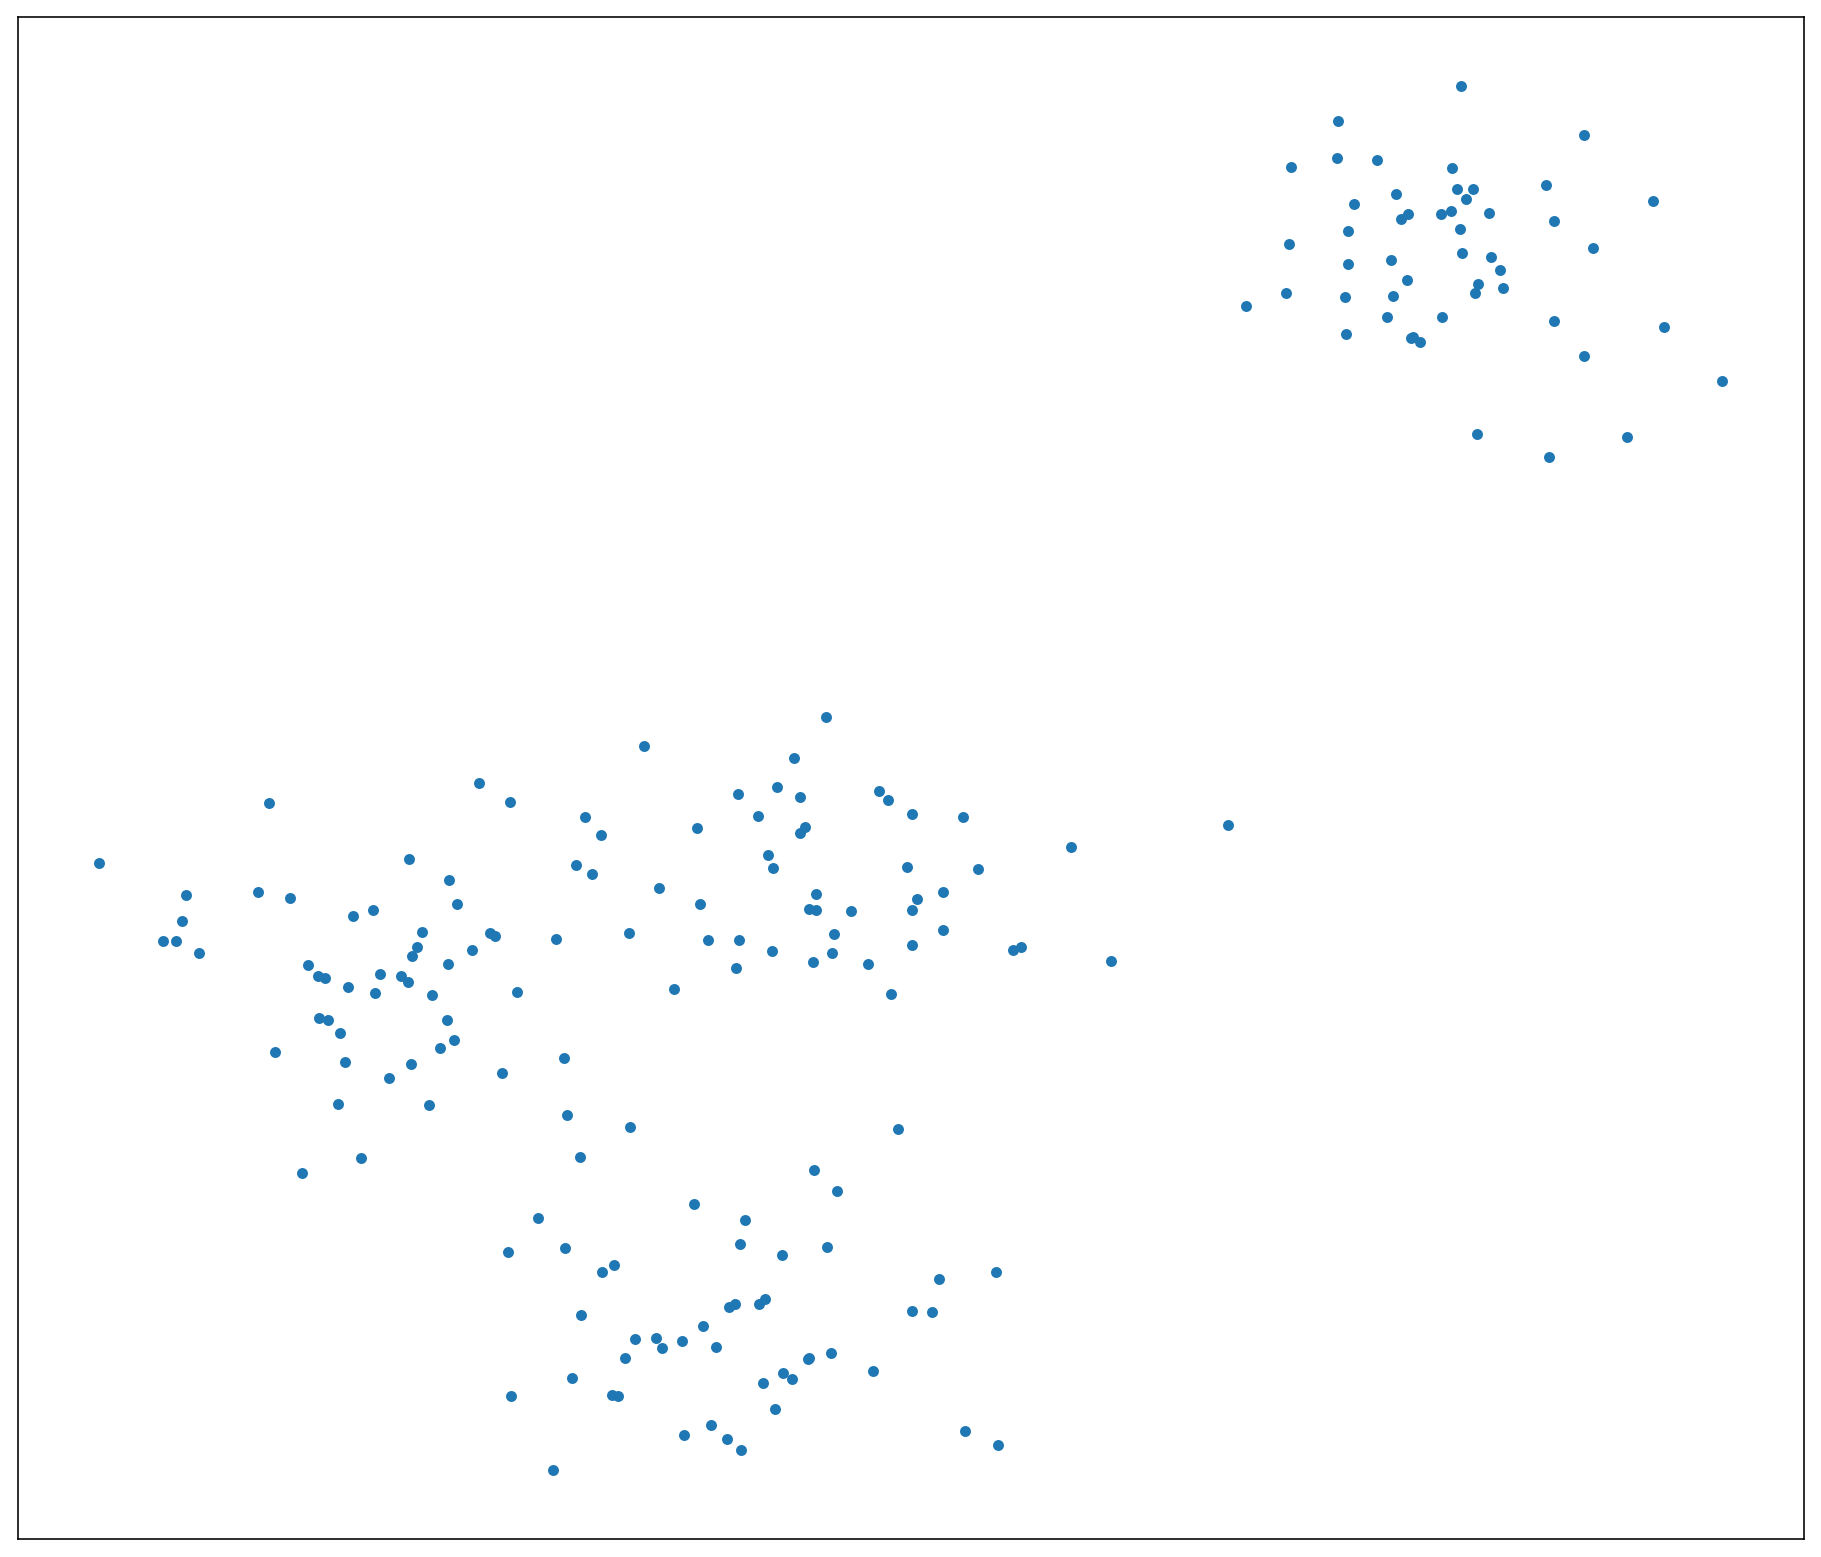

In [5]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

X,y = make_blobs(n_samples = 200,
                 n_features = 2,
                 centers = 4,
                cluster_std = 1,
                center_box = (-10.0,10.0),
                shuffle = True,
                random_state =1)

plt.figure(figsize = (16,14),dpi = 144)
plt.xticks(())
plt.yticks(())
plt.scatter(X[:,0],X[:,1],s = 20,marker = 'o')

In [7]:
from sklearn.cluster import KMeans

n_clusters = 3
kmean = KMeans(n_clusters = n_clusters)
kmean.fit(X)
print("Kmean:k={},cost = {}".format(n_clusters,int(kmean.score(X))))

Kmean:k=3,cost = -668


[0 1 2 2 0 1 1 1 2 0 1 0 2 0 0 2 0 2 0 2 0 0 2 1 0 1 1 2 2 0 0 2 2 2 0 0 2
 0 2 0 0 0 1 1 2 2 1 2 0 1 0 2 0 1 2 2 0 0 0 1 1 2 0 0 0 0 0 0 2 0 0 1 0 2
 1 0 2 2 2 2 0 1 2 2 0 0 0 1 2 2 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 2 0 2 1 0
 2 1 1 0 1 1 0 1 0 0 2 0 0 0 1 0 0 0 0 1 0 2 1 1 2 2 2 1 1 0 0 0 1 2 2 0 0
 1 0 2 1 1 0 1 0 0 1 0 1 0 0 0 1 2 0 0 0 2 1 0 0 2 2 1 0 1 1 0 0 0 0 1 1 2
 0 0 1 0 0 0 0 0 2 1 2 2 0 0 2]


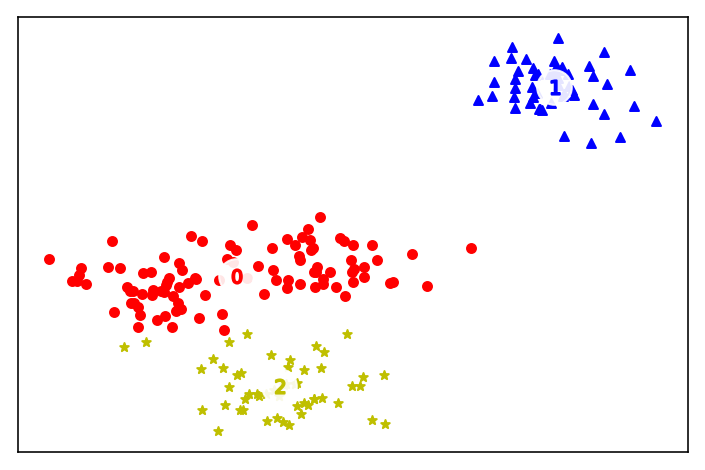

In [14]:
labels = kmean.labels_
center = kmean.cluster_centers_
markers = ['o','^','*']
colors = ['r','b','y']

plt.figure(figsize=(6,4),dpi = 144)
plt.xticks(())
plt.yticks(())

print(labels)
for c in range(n_clusters):
    cluster = X[labels ==c]
    plt.scatter(cluster[:,0],cluster[:,1],marker = markers[c],s = 20,c = colors[c])
    
plt.scatter(center[:,0],center[:,1],marker = 'o',c = 'white',alpha = 0.9,s = 300)
for i,c in enumerate(centers):
    #pass
    plt.scatter(c[0],c[1],marker = '$%d$'% i ,s = 50,c = colors[i])
    

In [24]:
def fit_plot_kmean_model(n_clusters,X):
    plt.xticks(())
    plt.yticks(())
    
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    markers = ['o','^','*','s']
    colors = ['r','b','y','k']
    
    score = kmeans.score(X)
    plt.title("k={},score = {}".format(n_clusters,(int)(score)))
    
    for c in range(n_clusters):
        cluster = X[labels ==c]
        plt.scatter(cluster[:,0],cluster[:,1],marker = markers[c],s = 20,c = colors[c])
        
    plt.scatter(center[:,0],center[:,1],marker = 'o',c = 'white',alpha = 0.9,s = 300)
    
    for i,c in enumerate(centers):
        plt.scatter(c[0],c[1],marker = '$%d$' %i,s = 50,c = colors[i])

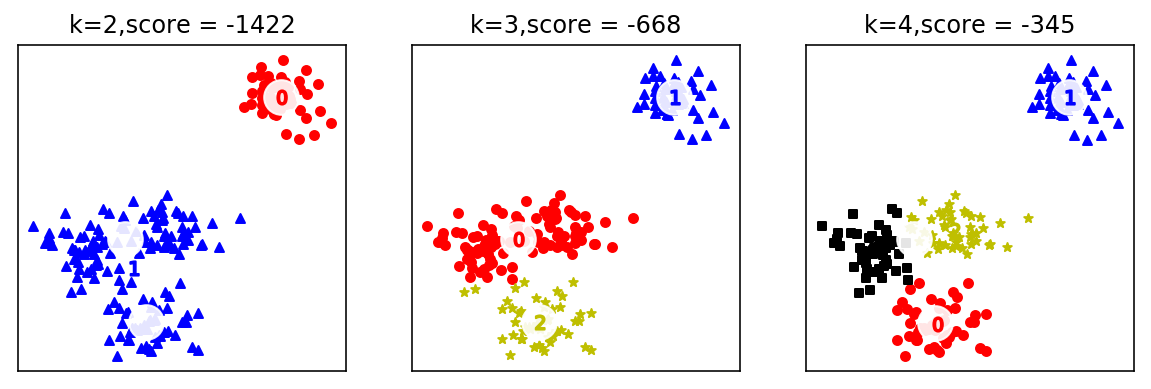

In [25]:
from sklearn.cluster import KMeans

n_clusters = [2,3,4]

plt.figure(figsize = (10,3),dpi = 144)
for i,c in enumerate(n_clusters):
    plt.subplot(1,3,i+1)
    fit_plot_kmean_model(c,X)

In [26]:
from time import time 
from sklearn.datasets import load_files

print("loadin documents ...")
t = time()
docs = load_files('clustering/data/')

print("summary:{0} documents in {1} categories.".format(len(docs.data),len(docs.target_names)))
print('done in {0} seconds'.format(time()-t))

loadin documents ...
summary:3949 documents in 4 categories.
done in 0.19740843772888184 seconds


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

max_features = 20000
print("vertorizing documents ...")

t = time()
vectorizer = TfidfVectorizer(max_df = 0.4,
                             min_df = 2,
                             max_features = max_features,
                             encoding = 'latin-1')

X = vectorizer.fit_transform((d for d in docs.data))
print("n_samples:%d,n_features:%d" % X.shape)
print("number of non-zero features in sample[{0}]:{1}".format(docs.filenames[0],X[0].getnnz()))

print('done in {0} seconds'.format(time() - t))



vertorizing documents ...
n_samples:3949,n_features:20000
number of non-zero features in sample[clustering/data/sci.electronics\11902-54322]:56
done in 0.7982320785522461 seconds


In [29]:
from sklearn.cluster import KMeans

print("clustering documents ...")

t = time()
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters,
              max_iter = 100,
              tol = 0.01,
              verbose = 1,
              n_init = 3)

kmeans.fit(X)
print("kmean:K = {},cost = {}".format(n_clusters,int(kmeans.inertia_)))
print("done in {0} seconds".format(time()-t))



clustering documents ...
Initialization complete
Iteration  0, inertia 7537.563
Iteration  1, inertia 3845.958
Iteration  2, inertia 3833.089
Iteration  3, inertia 3827.702
Iteration  4, inertia 3825.169
Iteration  5, inertia 3823.446
Iteration  6, inertia 3822.633
Iteration  7, inertia 3822.351
Iteration  8, inertia 3822.153
Iteration  9, inertia 3822.002
Iteration 10, inertia 3821.887
Iteration 11, inertia 3821.813
Iteration 12, inertia 3821.772
Iteration 13, inertia 3821.732
Iteration 14, inertia 3821.704
Iteration 15, inertia 3821.686
Iteration 16, inertia 3821.682
Iteration 17, inertia 3821.676
Iteration 18, inertia 3821.672
Converged at iteration 18: center shift 0.000000e+00 within tolerance 4.896692e-07
Initialization complete
Iteration  0, inertia 7422.805
Iteration  1, inertia 3848.981
Iteration  2, inertia 3839.436
Iteration  3, inertia 3834.282
Iteration  4, inertia 3830.970
Iteration  5, inertia 3827.889
Iteration  6, inertia 3825.481
Iteration  7, inertia 3824.631
Iterati

In [31]:
kmeans.labels_[1000:1010]

array([3, 3, 3, 0, 1, 0, 1, 3, 0, 0])

In [32]:
docs.filenames[1000:1010]

array(['clustering/data/sci.crypt\\10888-15289',
       'clustering/data/sci.crypt\\11490-15880',
       'clustering/data/sci.crypt\\11270-15346',
       'clustering/data/sci.electronics\\12383-53525',
       'clustering/data/sci.space\\13826-60862',
       'clustering/data/sci.electronics\\11631-54106',
       'clustering/data/sci.space\\14235-61437',
       'clustering/data/sci.crypt\\11508-15928',
       'clustering/data/sci.space\\13593-60824',
       'clustering/data/sci.electronics\\12304-52801'], dtype='<U43')

In [37]:
from  __future__ import print_function

print("top terms per cluster:")

order_centroids = kmeans.cluster_centers_.argsort()[:,::-1]

terms = vectorizer.get_feature_names()
for i in range(n_clusters):
    print("Cluster %d:" %i,end = '')
    for ind in order_centroids[i,:10]:
        print('%s' % terms[ind],end = '')
    print()

top terms per cluster:
Cluster 0:anymyknowmebyyouranyonedocaso
Cluster 1:spacehenrynasatorontopatmoonweshuttlezoogov
Cluster 2:msgshemypittgordongebbanksherhehas
Cluster 3:keyclipperencryptionchipgovernmentwillkeysescrowwensa


In [40]:
import numpy as np

a = np.array([10,30,20,40])
a.argsort()

array([0, 2, 1, 3], dtype=int64)

In [41]:
from sklearn import metrics

label_true = np.random.randint(1,4,6)
label_pred = np.random.randint(1,4,6)

print("Adjusted Rand-Index for random sample:%.3f"
     % metrics.adjusted_rand_score(label_true,label_pred))

label_true = [1,1,3,3,2,2]
label_pred = [3,3,2,2,1,1]

print("adjusted Rand-Index for same structure sample:%.3f" %metrics.adjusted_rand_score(label_true,label_pred))

Adjusted Rand-Index for random sample:-0.111
adjusted Rand-Index for same structure sample:1.000


In [44]:
from sklearn import metrics

label_true = [1,1,2,2]
label_pred = [2,2,1,1]

print("homegeneity score for same struure sample:%.3f" % metrics.homogeneity_score(label_true,label_pred))

label_true = [1,1,2,2]
label_pred = [0,1,2,3]

print("Homegeneity score for each cluster come from only one class:%.3f" %metrics.homogeneity_score(label_true,label_pred))

label_true = [1,1,2,2]
label_pred = [1,2,1,2]

print("Homegeneity score for each cluster come from two class:%.3f" %metrics.homogeneity_score(label_true,label_pred))

label_true = np.random.randint(1,4,6)
label_pred = np.random.randint(1,4,6)

print('Homegeneity score for random sample:%.3f' %metrics.homogeneity_score(label_true,label_pred))






homegeneity score for same struure sample:1.000
Homegeneity score for each cluster come from only one class:1.000
Homegeneity score for each cluster come from two class:0.000
Homegeneity score for random sample:0.734


In [49]:
from sklearn import metrics

label_true = [1,1,2,2]
label_pred = [2,2,1,1]

print("Completeness score for same structure sample:%3f" % metrics.completeness_score(label_true,label_pred))

label_true = [0,1,2,3]
label_pred = [1,1,2,2]

print("completeness_score for each cluster come from only one class:%.3f" %metrics.completeness_score(label_true,label_pred))

label_true = [1,1,2,2]
label_pred = [1,2,1,2]

print("completeness_score for each cluster come from two class:%.3f" %metrics.completeness_score(label_true,label_pred))

label_true = np.random.randint(1,4,6)
label_pred = np.random.randint(1,4,6)

print('completeness_score for random sample:%.3f' %metrics.completeness_score(label_true,label_pred))


Completeness score for same structure sample:1.000000
completeness_score for each cluster come from only one class:1.000
completeness_score for each cluster come from two class:0.000
completeness_score for random sample:0.367


In [52]:
from sklearn import metrics

label_true = [1,1,2,2]
label_pred = [2,2,1,1]

print("v-measure score for same structure sample:%3f" % metrics.v_measure_score(label_true,label_pred))

label_true = [0,1,2,3]
label_pred = [1,1,2,2]

print("v-measure score for each cluster come from only one class:%.3f" %metrics.v_measure_score(label_true,label_pred))
print("v-measure score for each cluster come from only one class:%.3f" %metrics.v_measure_score(label_pred,label_true))

label_true = [1,1,2,2]
label_pred = [1,2,1,2]

print("v-measure score for each cluster come from two class:%.3f" %metrics.v_measure_score(label_true,label_pred))

v-measure score for same structure sample:1.000000
v-measure score for each cluster come from only one class:0.667
v-measure score for each cluster come from only one class:0.667
v-measure score for each cluster come from two class:0.000


In [56]:
from sklearn import metrics

labels = docs.target

print("Homogeneity:%0.3f" %metrics.homogeneity_score(labels,kmeans.labels_))
print("Completeness:%0.3f" %metrics.completeness_score(labels,kmeans.labels_))
print("V-measure:%0.3f"%metrics.v_measure_score(labels,kmeans.labels_))
print("Adjusted Rand-Index:%0.3f"% metrics.adjusted_rand_score(labels,kmeans.labels_))
print("silhoustte Coefficient:%.3f" %metrics.silhouette_score(X,kmeans.labels_,sample_size = 1000))



Homogeneity:0.499
Completeness:0.567
V-measure:0.531
Adjusted Rand-Index:0.354
silhoustte Coefficient:0.005
